In [246]:
#pandas for data manipulation
import pandas as pd

#import string module to get punctuation
import string

#import useless words (also kown as stop words)
from nltk.corpus import stopwords

#create stem
from nltk.stem import PorterStemmer

#import vectorizer to make a sparse matrix
from sklearn.feature_extraction.text import CountVectorizer

#visualize 
from matplotlib import pyplot as plt
import seaborn as sns

In [99]:
#gettting all punctuation from string module
punctuation = list(string.punctuation)

#getting useless words (stoipwords)
useless_words = stopwords.words('english')

#lets instantiate the stemmer
stemmer = PorterStemmer()

#lets instantiate the countvectorizer that will make our sparse_matrix
cv = CountVectorizer(min_df=5)

In [3]:
#import our data
reviews = pd.read_csv("Restaurant_Reviews.tsv", sep="\t")

In [4]:
reviews.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [11]:
def locomment(x):
    comment = x['Review']
    return len(comment)

In [13]:
reviews['length'] = reviews.apply(locomment, axis=1)

In [14]:
reviews

,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


<AxesSubplot:xlabel='Liked', ylabel='length'>

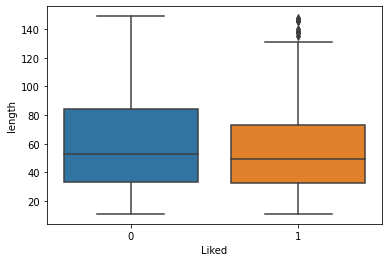

In [18]:
sns.boxplot(data=reviews, y='length', x='Liked')

In [34]:
reviews['Review']

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object

In [59]:
def bow(x):
    review = x['Review']
    
    #convert all reviews to lowercase
    review = review.lower()
    
    #remove punctuation
    review = [char for char in list(review) if char not in punctuation]
    #join characters back
    review = ''.join(review)
    
    #remove useless words
    review = [stemmer.stem(word) for word in review.split() if word not in useless_words]
    #join words together
    review = ' '.join(review)
    
    return review

In [61]:
reviews['bow'] = reviews.apply(bow, axis=1)

In [62]:
reviews

,Review,Liked,length,bow
0,Wow... Loved this place.,1,24,wow love place
1,Crust is not good.,0,18,crust good
2,Not tasty and the texture was just nasty.,0,41,tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,select menu great price
...,...,...,...,...
995,I think food should have flavor and texture an...,0,66,think food flavor textur lack
996,Appetite instantly gone.,0,24,appetit instantli gone
997,Overall I was not impressed and would not go b...,0,50,overal impress would go back
998,"The whole experience was underwhelming, and I ...",0,91,whole experi underwhelm think well go ninja su...


In [100]:
cv.fit(reviews['bow'])

CountVectorizer(min_df=5)

In [101]:
sparse_matrix = cv.transform(reviews['bow'])

In [102]:
sparse_matrix = sparse_matrix.toarray()

In [103]:
sparse_matrix = pd.DataFrame(sparse_matrix)

In [107]:
features = pd.concat([sparse_matrix, reviews['length']], axis=1)
labels = reviews['Liked']

In [98]:
#cv.vocabulary_

In [108]:
#features
labels

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [110]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(features, labels, test_size=0.2, random_state=101)

In [112]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(Xtrain, ytrain)
predl = lr.predict(Xtest)

/Users/sikpe/opt/anaconda3/envs/cobra/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sikpe/opt/anaconda3/envs/cobra/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [114]:
#pd.DataFrame({'actual': ytest, 'predicted': predl})

In [115]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf.fit(Xtrain, ytrain)
predr = rf.predict(Xtest)

/Users/sikpe/opt/anaconda3/envs/cobra/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sikpe/opt/anaconda3/envs/cobra/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [116]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(Xtrain, ytrain)
predx = xgb.predict(Xtest)

In [117]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(Xtrain, ytrain)
predk = knn.predict(Xtest)

/Users/sikpe/opt/anaconda3/envs/cobra/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sikpe/opt/anaconda3/envs/cobra/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [118]:
from sklearn.metrics import classification_report

### Logistic Regression performance

In [121]:
print(classification_report(ytest, predl))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       102
           1       0.77      0.81      0.79        98

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



### Random Forest performance

In [122]:
print(classification_report(ytest, predr))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74       102
           1       0.72      0.78      0.75        98

    accuracy                           0.74       200
   macro avg       0.75      0.75      0.74       200
weighted avg       0.75      0.74      0.74       200



### XGBoost performance

In [123]:
print(classification_report(ytest, predx))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       102
           1       0.74      0.69      0.72        98

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200



### KNN performance

In [124]:
print(classification_report(ytest, predk))

              precision    recall  f1-score   support

           0       0.53      0.58      0.55       102
           1       0.52      0.47      0.49        98

    accuracy                           0.53       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.52      0.53      0.52       200



### Testing the algorithm

In [223]:
steve_comment = "this is was an awesome experience"

In [236]:
def test(comment, cv, algo):
    length = len(comment)
    comment = bow({'Review': comment}) 
    comment = cv.transform([comment]).toarray()
    comment = pd.DataFrame(comment)
    comment['length'] = length
    #return 1
    return algo.predict(comment)

In [245]:
test(steve_comment, cv, rf)

/Users/sikpe/opt/anaconda3/envs/cobra/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([1])